In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet

# Load data from CSV file
df = pd.read_csv('test kolkata.csv')
# Rename columns to match NeuralProphet's input format
df = df.rename(columns={'ds': 'ds', 'y': 'y'})

# Visualize the data
plt.plot(df['ds'], df['y'])
plt.title('Temperature vs. Date')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

# Preprocess the data
df['ds'] = pd.to_datetime(df['ds'])
# Fill missing values with linear interpolation
df['y'] = df['y'].interpolate()

# Split the data into train and test sets
train_df = df[:-30]  # Use the first 30 rows for training
test_df = df[-30:]  # Use the last 30 rows for testing

# Train the model
model = NeuralProphet()
model.fit(train_df, freq='D')

# Make predictions
future = model.make_future_dataframe(test_df, periods=30)
forecast = model.predict(future)

# Visualize the predictions
fig, ax = plt.subplots()
ax.plot(test_df['ds'], test_df['y'], label='Actual')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2)
plt.title('Temperature vs. Date')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


c:\Users\Asus\anaconda3\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


KeyError: 'ds'

In [2]:
pip install neuralprophet


  Using cached neuralprophet-0.5.2-py3-none-any.whl (146 kB)
  Using cached plotly_resampler-0.8.3.2-cp39-cp39-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


     -------------------------------------- 146.0/146.0 kB 4.2 MB/s eta 0:00:00
     ------------------------------------- 827.8/827.8 kB 17.4 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 26.0 MB/s eta 0:00:00
     ------------------------------------- 230.6/230.6 kB 14.7 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB ? eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 21.0 MB/s eta 0:00:00
     --------------------------------------- 15.2/15.2 MB 34.4 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 39.9 MB/s eta 0:00:00
     ---------------------------------------- 519.2/519.2 kB ? eta 0:00:00
     ---------------------------------------- 46.4/46.4 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements 

In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as pyplot
import pickle 

In [4]:
df = pd.read_csv('test kolkata.csv')
df.head()

,date,precipitation,avg_temp
0,2013-01-01T00:00:00,NaN,18.4
1,2013-01-02T00:00:00,NaN,20.7
2,2013-01-03T00:00:00,5.1,18.7
3,2013-01-04T00:00:00,0.0,19.1
4,2013-01-05T00:00:00,NaN,18.2


In [5]:
df.dtypes

date              object
precipitation    float64
avg_temp         float64
dtype: object

In [7]:
melb = df
melb['date'] = pd.to_datetime(melb['date'])
melb.head()

,date,precipitation,avg_temp
0,2013-01-01,NaN,18.4
1,2013-01-02,NaN,20.7
2,2013-01-03,5.1,18.7
3,2013-01-04,0.0,19.1
4,2013-01-05,NaN,18.2


In [8]:
melb.dtypes

date             datetime64[ns]
precipitation           float64
avg_temp                float64
dtype: object

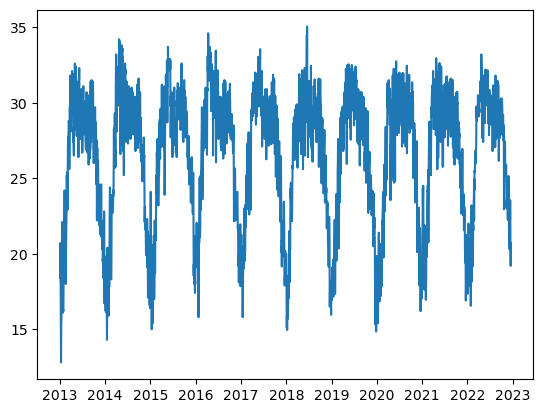

In [9]:
plt.plot(melb['date'], melb['avg_temp'])
plt.show()

In [10]:
melb.tail

<bound method NDFrame.tail of            date  precipitation  avg_temp
0    2013-01-01            NaN     18.40
1    2013-01-02            NaN     20.70
2    2013-01-03            5.1     18.70
3    2013-01-04            0.0     19.10
4    2013-01-05            NaN     18.20
...         ...            ...       ...
3632 2022-12-15            NaN     21.10
3633 2022-12-16            NaN     19.80
3634 2022-12-17            NaN     19.20
3635 2022-12-18            NaN     20.55
3636 2022-12-19            NaN     20.70

[3637 rows x 3 columns]>

In [12]:
data = melb[['date', 'avg_temp']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Asus\AppData\Local\Temp\ipykernel_13944\1745489176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2013-01-01,18.4
1,2013-01-02,20.7
2,2013-01-03,18.7
3,2013-01-04,19.1
4,2013-01-05,18.2


In [13]:
data

,ds,y
0,2013-01-01,18.40
1,2013-01-02,20.70
2,2013-01-03,18.70
3,2013-01-04,19.10
4,2013-01-05,18.20
...,...,...
3632,2022-12-15,21.10
3633,2022-12-16,19.80
3634,2022-12-17,19.20
3635,2022-12-18,20.55


In [16]:
m = NeuralProphet()
m.fit(data,freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.918% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (114) is too small than the required number for the learning rate finder (239). The results might not be optimal.
Missing logger folder: c:\Users\Asus\Desktop\projeckt noaa\lightning_logs


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,17.982784,21.558580,0.435931,0.0,0
1,16.635811,19.996500,0.386289,0.0,1
2,15.339067,18.443832,0.339342,0.0,2
3,14.078755,16.980787,0.294567,0.0,3
4,12.875057,15.548660,0.252836,0.0,4
...,...,...,...,...,...
995,1.246283,1.565854,0.002553,0.0,995
996,1.246503,1.565319,0.002553,0.0,996
997,1.247350,1.567836,0.002555,0.0,997
998,1.246940,1.565149,0.002554,0.0,998


In [26]:
future = m.make_future_dataframe(data, periods=70)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.918% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.571% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 114it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-20,None,19.798958,27.075912,-7.235238,-0.041715
1,2022-12-21,None,19.696028,27.076534,-7.348733,-0.031774
2,2022-12-22,None,19.637270,27.077158,-7.457871,0.017983
3,2022-12-23,None,19.599995,27.077782,-7.562382,0.084596
4,2022-12-24,None,19.433247,27.078403,-7.662006,0.016849


In [27]:
forecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
65,2023-02-23,None,24.511713,27.116409,-2.622679,0.017983
66,2023-02-24,None,24.771330,27.117031,-2.430299,0.084596
67,2023-02-25,None,24.896509,27.117657,-2.237996,0.016849
68,2023-02-26,None,25.035503,27.118279,-2.045969,-0.036806
69,2023-02-27,None,25.255352,27.118900,-1.854415,-0.009134


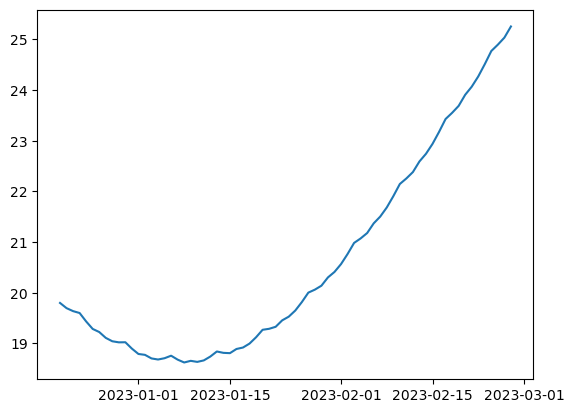

In [34]:
plt.plot(forecast['ds'], forecast['yhat1'])
plt.show() 

In [35]:
plot2 = m.plot_components(forecast)

In [40]:
with open('forecast_model.pkl', "wb") as f:
    pickle.dump(m, f)

NameError: name 'pickle' is not defined